In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [62]:
wildlife = pd.read_csv('../clean_data/wildlife_clean.csv', parse_dates=['CALL_SAVED_TIME'])

In [63]:
wildlife.shape

(152743, 6)

In [64]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152743 entries, 0 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       152743 non-null  int64         
 1   CALL_REGION      152743 non-null  object        
 2   CALL_SAVED_TIME  152672 non-null  datetime64[ns]
 3   CA_ANIMAL_TYPE   152743 non-null  object        
 4   reason_for_call  152743 non-null  object        
 5   type_of_calls    152743 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 7.0+ MB


In [5]:
wildlife

,Unnamed: 0,CALL_REGION,CALL_SAVED_TIME,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
0,0,Central,2020-01-01,Deer,rescue,report_calls
1,1,Central,2020-01-01,Deer,rescue,report_calls
2,2,Central,2020-01-01,Deer,rescue,report_calls
3,3,Aberdeen,2020-01-01,Wild Bird,injury,report_calls
4,4,Central,2020-01-01,Gull,injury,report_calls
...,...,...,...,...,...,...
152738,153369,Central,2018-12-31,Swan,injury,report_calls
152739,153370,Glasgow,2018-12-31,Wild Bird,injury,report_calls
152740,153371,Aberdeen,2018-12-31,Wild Bird,injury,report_calls
152741,153372,Glasgow,2018-12-31,Wild Bird,injury,report_calls


In [70]:
wildlife_injuries = wildlife[wildlife['reason_for_call']=='injury'].copy()
wildlife_injuries.info()
#Client is mostly interested in injuries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83661 entries, 3 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       83661 non-null  int64         
 1   CALL_REGION      83661 non-null  object        
 2   CALL_SAVED_TIME  83633 non-null  datetime64[ns]
 3   CA_ANIMAL_TYPE   83661 non-null  object        
 4   reason_for_call  83661 non-null  object        
 5   type_of_calls    83661 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


## Trend by region

In [7]:
df_count = wildlife_injuries.groupby('CALL_REGION').count().sort_values(['reason_for_call'], ascending = False)[['reason_for_call']]

In [8]:
df_count['Region'] = df_count.index

In [9]:
df_count
#there are more injuries in Glasgow reported, due to more population?

,reason_for_call,Region
CALL_REGION,,
Glasgow,22056,Glasgow
Central,18826,Central
Aberdeen,15993,Aberdeen
Edinburgh,14996,Edinburgh
Unknown,6117,Unknown
Inverness,5673,Inverness


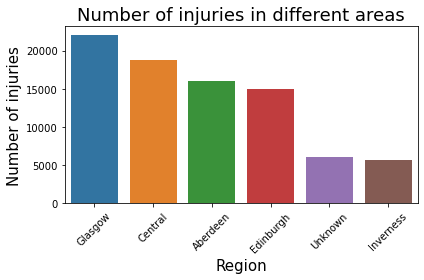

In [10]:
sns.barplot(x = 'Region',y = 'reason_for_call', data = df_count)
plt.xticks(rotation = 45)
plt.xlabel("Region", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries in different areas", size=18)
plt.tight_layout()

## Trend by year

In [69]:
wildlife_injuries

,Unnamed: 0,CALL_REGION,CALL_SAVED_TIME,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
3,3,Aberdeen,2020-01-01,Wild Bird,injury,report_calls
4,4,Central,2020-01-01,Gull,injury,report_calls
5,5,Edinburgh,2020-01-01,Wild Bird,injury,report_calls
9,9,Edinburgh,2020-01-01,Wild Bird,injury,report_calls
10,10,Glasgow,2020-01-01,Fox,injury,report_calls
...,...,...,...,...,...,...
152738,153369,Central,2018-12-31,Swan,injury,report_calls
152739,153370,Glasgow,2018-12-31,Wild Bird,injury,report_calls
152740,153371,Aberdeen,2018-12-31,Wild Bird,injury,report_calls
152741,153372,Glasgow,2018-12-31,Wild Bird,injury,report_calls


In [79]:
df_time = wildlife_injuries.groupby(['CALL_SAVED_TIME', 'CALL_REGION']).count()
df_time.index

MultiIndex([('2018-01-01',  'Aberdeen'),
            ('2018-01-01',   'Central'),
            ('2018-01-01', 'Edinburgh'),
            ('2018-01-01',   'Glasgow'),
            ('2018-01-01', 'Inverness'),
            ('2018-01-01',   'Unknown'),
            ('2018-01-02',  'Aberdeen'),
            ('2018-01-02',   'Central'),
            ('2018-01-02', 'Edinburgh'),
            ('2018-01-02',   'Glasgow'),
            ...
            ('2020-04-29', 'Edinburgh'),
            ('2020-04-29',   'Glasgow'),
            ('2020-04-29', 'Inverness'),
            ('2020-04-29',   'Unknown'),
            ('2020-04-30',  'Aberdeen'),
            ('2020-04-30',   'Central'),
            ('2020-04-30', 'Edinburgh'),
            ('2020-04-30',   'Glasgow'),
            ('2020-04-30', 'Inverness'),
            ('2020-04-30',   'Unknown')],
           names=['CALL_SAVED_TIME', 'CALL_REGION'], length=5074)

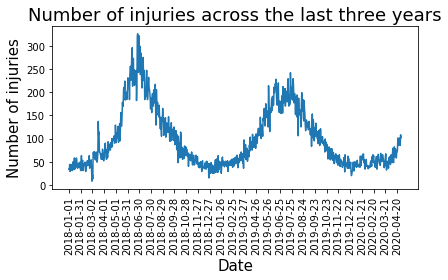

In [12]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xticks(np.arange(0, 852, 30),rotation = 90)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries across the last three years", size=18)
plt.tight_layout()

Looks like there is a trend of increase in injuries at summer time. Possibly because people walk more often and report injuries?

(0.0, 500.0)

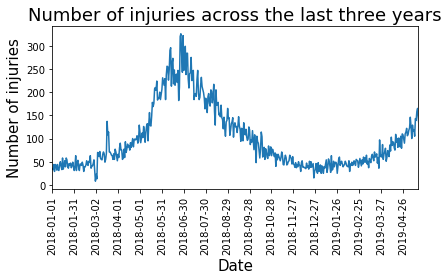

In [13]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xticks(np.arange(0, 852, 30),rotation = 90)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries across the last three years", size=18)
plt.tight_layout()
plt.xlim(0,500)

Quite a big spikes of report at around spring time in 2018.

## By year and region

In [61]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152743 entries, 0 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       152743 non-null  int64 
 1   CALL_REGION      152743 non-null  object
 2   CALL_SAVED_TIME  152672 non-null  object
 3   CA_ANIMAL_TYPE   152743 non-null  object
 4   reason_for_call  152743 non-null  object
 5   type_of_calls    152743 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.0+ MB


In [58]:
df_time_region = wildlife_injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME', freq='W'), 'CALL_REGION'], as_index=False).count()
#df_time_region.reset_index(inplace=True)
#df_time_region.loc[:, 'CALL_SAVED_TIME'] = pd.to_datetime(df_time_region.CALL_SAVED_TIME)
#df_time_region.set_index('CALL_SAVED_TIME').resample(rule='W').count()
df_time_region

TypeError: '<' not supported between instances of 'str' and 'float'

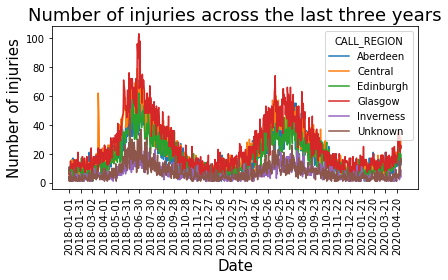

In [53]:
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", hue = 'CALL_REGION',data = df_time_region)
plt.xticks(np.arange(0, 852, 30),rotation = 90)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries across the last three years", size=18)
plt.tight_layout()

<AxesSubplot:xlabel='CALL_SAVED_TIME', ylabel='reason_for_call'>

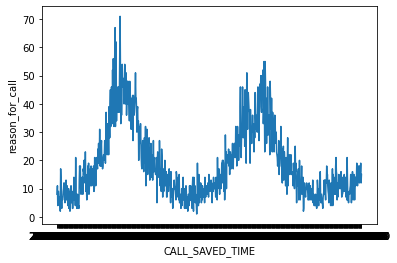

In [56]:
aberdeen = df_time_region.query('CALL_REGION=="Aberdeen"')
aberdeen.loc[:, 'CALL_SAVED_TIME'] = 
sns.lineplot(data = aberdeen,x = 'CALL_SAVED_TIME',y = 'reason_for_call')

In [55]:
df_time_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5073
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CALL_SAVED_TIME  5074 non-null   object
 1   CALL_REGION      5074 non-null   object
 2   Unnamed: 0       5074 non-null   int64 
 3   CA_ANIMAL_TYPE   5074 non-null   int64 
 4   reason_for_call  5074 non-null   int64 
 5   type_of_calls    5074 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 277.5+ KB


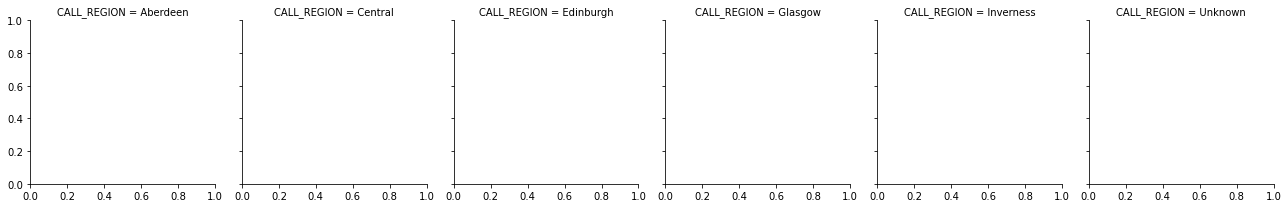

In [51]:
separate = sns.FacetGrid(df_time_region, col = 'CALL_REGION')
separate.map(sns.lineplot())

# Trend by types of animals

In [17]:
df_type_region = wildlife_injuries.groupby(['CALL_REGION','CA_ANIMAL_TYPE']).count()
df_type_region

Unnamed: 0  CALL_SAVED_TIME  reason_for_call  \
CALL_REGION CA_ANIMAL_TYPE                                                  
Aberdeen    *Other Wildlife         192              192              192   
            Badger                   40               40               40   
            Bat                     170              170              170   
            Deer                    615              615              615   
            Duck                    259              259              259   
...                                 ...              ...              ...   
Unknown     Swan                    313              313              313   
            Weasel                    6                6                6   
            Wild Bird              2495             2494             2495   
            Wild Mouse               32               32               32   
            Wild Rabbit              65               65               65   

                             type_of_calls  
CALL_REGION CA_ANIMAL_TYPE                  
Aberdeen    *Other Wildlife            192  
            Badger                      40  
            Bat                        170  
            Deer                       615  
            Duck                       259  
...                                    ...  
Unknown     Swan                       313  
            Weasel                       6  
            Wild Bird                 2495  
            Wild Mouse                  32  
            Wild Rabbit                 65  

[143 rows x 4 columns]

In [18]:
df_type_region['Region_and_type'] = df_type_region.index

In [19]:
df_type_region

Unnamed: 0  CALL_SAVED_TIME  reason_for_call  \
CALL_REGION CA_ANIMAL_TYPE                                                  
Aberdeen    *Other Wildlife         192              192              192   
            Badger                   40               40               40   
            Bat                     170              170              170   
            Deer                    615              615              615   
            Duck                    259              259              259   
...                                 ...              ...              ...   
Unknown     Swan                    313              313              313   
            Weasel                    6                6                6   
            Wild Bird              2495             2494             2495   
            Wild Mouse               32               32               32   
            Wild Rabbit              65               65               65   

                             type_of_calls              Region_and_type  
CALL_REGION CA_ANIMAL_TYPE                                               
Aberdeen    *Other Wildlife            192  (Aberdeen, *Other Wildlife)  
            Badger                      40           (Aberdeen, Badger)  
            Bat                        170              (Aberdeen, Bat)  
            Deer                       615             (Aberdeen, Deer)  
            Duck                       259             (Aberdeen, Duck)  
...                                    ...                          ...  
Unknown     Swan                       313              (Unknown, Swan)  
            Weasel                       6            (Unknown, Weasel)  
            Wild Bird                 2495         (Unknown, Wild Bird)  
            Wild Mouse                  32        (Unknown, Wild Mouse)  
            Wild Rabbit                 65       (Unknown, Wild Rabbit)  

[143 rows x 5 columns]

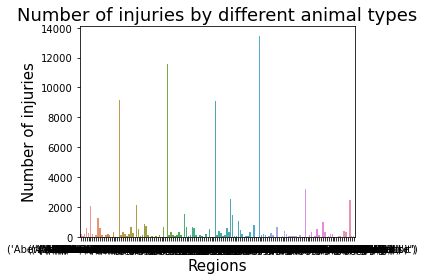

In [20]:
sns.barplot(x="Region_and_type", y="reason_for_call", data=df_type_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()